In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stc

In [2]:
# Load the data file using pandas
data=pd.read_csv("googleplaystore.csv")
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
# Check for null values in the data. Get the number of null values for each column
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
# Drop records with nulls in any of the columns
df=data.dropna()
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [5]:
# Variables seem to have incorrect type and inconsistent formatting. You need to fix them
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [7]:
df=df[-df['Size'].str.contains('Vari')]

In [8]:
df.loc[:,"SizeNum"]=df.Size.str.rstrip("Mk+")
df.SizeNum=pd.to_numeric(df['SizeNum'])
df.SizeNum.dtype

dtype('float64')

In [9]:
df['SizeNum']=np.where(df.Size.str.contains('M'),df.SizeNum*1000,df.SizeNum)

In [10]:
df.Size=df.SizeNum
df.drop('SizeNum',axis=1,inplace=True)

In [11]:
# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float)
df.Reviews.dtype

dtype('O')

In [12]:
df.Reviews=pd.to_numeric(df.Reviews)
df.Reviews.dtype

dtype('int64')

In [13]:
# Installs field is currently stored as string and has values like 1,000,000+
# Treat 1,000,000+ as 1,000,000
df['Installs']=df.Installs.str.replace("+","")

<ipython-input-13-a79930cff1f5>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Installs']=df.Installs.str.replace("+","")


In [14]:
# remove ‘+’, ‘,’ from the field, convert it to integer
df['Installs']=df.Installs.str.replace(",","")
df.Installs.dtype

dtype('O')

In [15]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [16]:
# convert it to integer
df.Installs=pd.to_numeric(df.Installs)
df.Installs.dtype

dtype('int64')

In [17]:
# Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df.Price.dtype

dtype('O')

In [18]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [19]:
df.Price=df.Price.str.replace("$","")
df.Price=pd.to_numeric(df.Price)
df.Price.dtype

<ipython-input-19-c86b118f20e5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.Price=df.Price.str.replace("$","")


dtype('float64')

In [20]:
# Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
df=df[(df.Rating>=1) & (df.Rating<=5)]
len(df.index)

7723

In [21]:
# Reviews should not be more than installs 
df.drop(df.index[df.Reviews>df.Installs], axis=0, inplace=True)
len(df.index)

7717

In [22]:
# For free apps (type = “Free”), the price should not be >0. Drop any such rows
index_free_and_price_not_0=df.index[((df.Type=='Free')&(df.Price>0))]
len(index_free_and_price_not_0)
df.drop(index_free_and_price_not_0,axis=0,inplace=True)

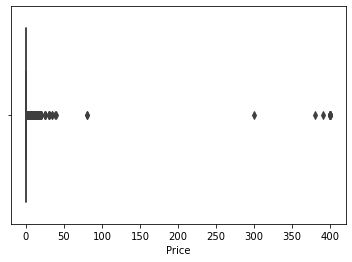

In [23]:
# univariate analysis
# Boxplot for Price
bx_price = sns.boxplot(x='Price',data=df)

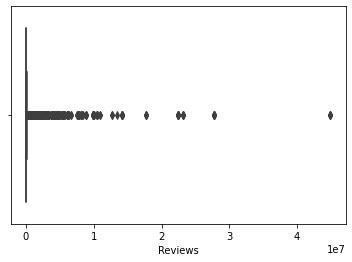

In [24]:
# Boxplot for Price
bx_review = sns.boxplot(x='Reviews',data=df)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

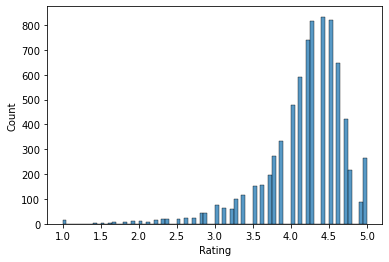

In [25]:
# Histogram for Rating
sns.histplot(x='Rating',data=df)

<AxesSubplot:xlabel='Size', ylabel='Count'>

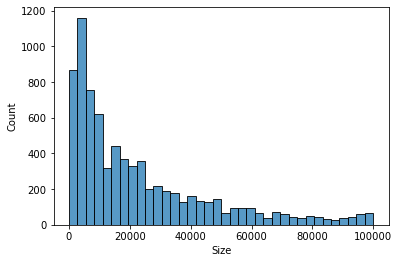

In [26]:
# Histogram for Size
sns.histplot(x='Size',data=df)

<AxesSubplot:xlabel='Size', ylabel='Count'>

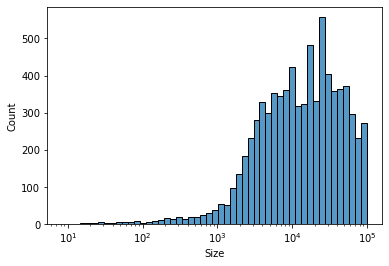

In [27]:
sns.histplot(x='Size',data=df,log_scale=True)

In [28]:
# Outlier Treatment-1
# A price of $200 for an application on the Play Store is very high and suspicious
df[df.Price>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [29]:
df.drop(df.index[(df.Price>=200)],inplace=True)

In [30]:
len(df.index)

7702

In [31]:
# Outlier Treatment-2
# Drop records having more than 2 million reviews.
df.drop(df.index[(df.Reviews>=2000000)], inplace=True)
len(df.index)

7483

In [32]:
# Outlier Treatment-3
# Apps having very high number of installs should be dropped from the analysis
# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
install_10_perc=np.percentile(df.Installs,10)
install_10_perc

1000.0

In [33]:
install_25_perc=np.percentile(df.Installs,25)
install_25_perc

10000.0

In [34]:
install_50_perc=np.percentile(df.Installs,50)
install_50_perc

100000.0

In [35]:
install_70_perc=np.percentile(df.Installs,70)
install_70_perc

1000000.0

In [36]:
install_90_perc=np.percentile(df.Installs,90)
install_90_perc

10000000.0

In [37]:
install_95_perc=np.percentile(df.Installs,95)
install_95_perc

10000000.0

In [38]:
install_99_perc=np.percentile(df.Installs,99)
install_99_perc

50000000.0

In [39]:
# drop data of installation above 90 percentile
df.drop(df.index[df.Installs>=install_99_perc],inplace=True)
len(df.index)

7307

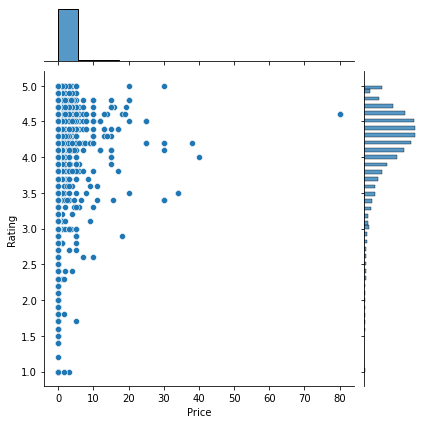

In [40]:
# Bivariate analysis 
# Make scatter plot/joinplot for Rating vs. Price
#sns.scatterplot(x='Price',y='Rating',data=df)
sns.jointplot(x='Price',y='Rating',data=df)

# Most apps with high price have "Rating > 3"
# relationship is weak

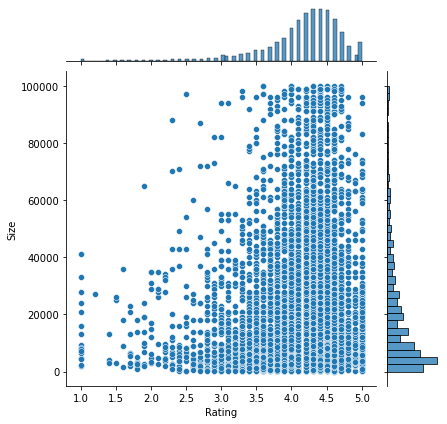

In [41]:
# Make scatter plot/joinplot for Rating vs. Size
sns.jointplot(x='Rating',y='Size',data=df)

# most apps rated above 3. Weak relation, almost points are evenly distributed 

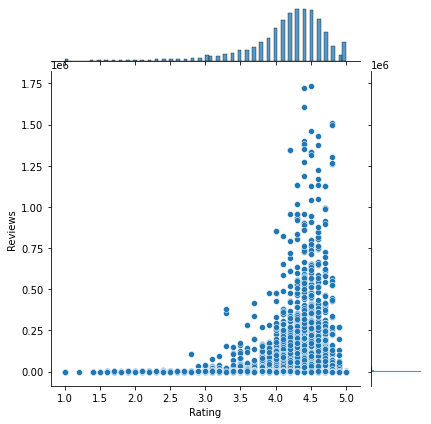

In [42]:
# Make scatter plot/joinplot for Rating vs. Reviews
sns.jointplot(x='Rating',y='Reviews',data=df)

# higher reiview for highly rated apps

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

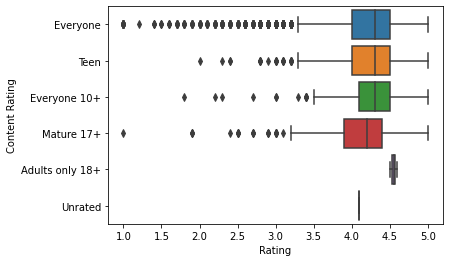

In [43]:
# Make boxplot for Rating vs. Content Rating
sns.boxplot(x='Rating',y='Content Rating',data=df)

# Apps of Adults only 18+ has higher rating
# all other are same.
#  Content has good impact on Rating

<AxesSubplot:xlabel='Rating', ylabel='Category'>

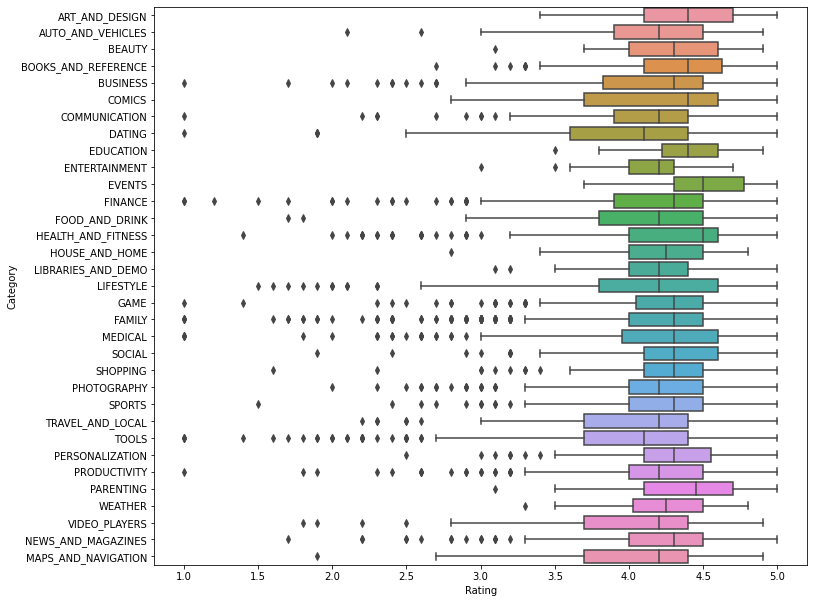

In [44]:
# Make boxplot for Ratings vs. Category
a4_dimen=(11.7,10.27)
fig, ax = plt.subplots(figsize=a4_dimen)
sns.boxplot(x='Rating',y='Category',data=df,ax=ax)

# The best genre is Events

In [45]:
# Data preprocessing
# create a copy of the dataframe to make all the edits. Name it inp1.
inp1 =df.copy()

In [46]:
# Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs
inp1.Reviews=inp1.Reviews.apply(np.log1p)
inp1.Installs=inp1.Installs.apply(np.log1p)

In [47]:
# Drop columns App, Last Updated, Current Ver, and Android Ver
inp1.columns
inp1.drop(columns=['App','Last Updated','Current Ver','Android Ver'],inplace=True)

In [48]:
inp1.shape

(7307, 9)

In [49]:
# Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric
# Name of dataframe should be inp2

inp2=pd.get_dummies(inp1)

In [50]:
inp2.shape

(7307, 158)

In [51]:
# Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
# create data & target. Target will be "Rating", so exclude Rating to get data.

data = inp2.drop(columns='Rating')
data.shape

(7307, 157)

In [52]:
target = pd.DataFrame(inp2.Rating)
target.shape

(7307, 1)

In [53]:
# Separate the dataframes into X_train, y_train, X_test, and y_test.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.3, random_state=3)
print("x_train shape is ", x_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", x_test.shape)
print("y_test shape is ", y_test.shape)

x_train shape is  (5114, 157)
y_train shape is  (5114, 1)
x_test shape is  (2193, 157)
y_test shape is  (2193, 1)


In [54]:
# Model building
# Use linear regression as the technique
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [55]:
# Report the R2 on the train set
from sklearn.metrics import r2_score
train_pred=model.predict(x_train)
print("R2 value of the model (by train) is ",r2_score(y_train,train_pred))

R2 value of the model (by train) is  0.15264772134593874


In [56]:
# Predictions on test set and report R2
test_pred=model.predict(x_test)
print("R2 value of the model (by test) is ", r2_score(y_test,test_pred))

R2 value of the model (by test) is  0.14262263030973144
